<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image001.png"
     alt="CMSE Grapical Image"
     style="float: right; margin-right: 10px;" 
     height="164" 
     width="164" />
# __CMSE  201 - Fall 2019__
    

# Homework 6: Practicing all of your data fitting skills

## Goals

### By the end of the homework assignment you will have practiced:

1. Fitting the properties of unfamiliar data using:
    - `polyfit()`
    - `curve_fit()`
    - The Metropolis-Hastings MCMC algorithm
2. Visualizing your results

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, November 22** It should be uploaded into the "Homework Assignments" submission folder for Homework #6.  Submission instructions can be found at the end of the notebook.

## Grading

* Question 1 (**2 points**)
* Question 2 (**4 points**)
* Question 3 (**2 points**)
* Question 4 (**8 points**)
* Question 5 (**4 points**)
* Question 6 (**4 points**)
* Question 7 (**8 points**)
* Question 8 (**2 points**)
* Question 9 (**1 point**)
* Question 10 (**1 point**)
* Question 11 (**12 points**)
    
**Total**: 48 points

---
# Becoming a data fitting wizard

At this point in the semester, you've had the opportunity to test your ability to fit models to data and extract best fit parameters. For this assignment, you're going to practice these skills again! 

This time, you're going to be working with a top secret dataset and the origins of the values are classified. While this makes it a bit challenging to know exactly what the right model is, you're going to do your best and report back to the authorities that provided you with the data.

So, **let's get to it!**

The data file that you're going to be working is aptly named `mystery.csv` and you should have downloaded it from D2L along with this notebook. Again, since you don't have any idea exactly what this data represents, you're going to explore various models that might serve as good representations of the general trends within the data.

First things first -- time to load in the data! 

**Question 1 (2 points)**: Using either Pandas or NumPy, read the two columns in the data file into your python notebook and store the the first column as `x` and the second column as `y`.

In [3]:
# Put your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

mys=pd.read_csv('mystery.csv', names=['x','y'])
mys

,x,y
0,-1.809264,-3.193143
1,-2.052769,-4.197102
2,2.642235,-2.725068
3,-1.949070,-5.047449
4,3.506515,2.758897
5,-2.340561,-1.802808
6,3.593741,4.958850
7,-0.732412,-4.846446
8,0.400804,-2.538593
9,3.873790,3.396949


**Question 2 (4 points)**: Now that you've loaded in the data, make a plot that shows how `y` changes as a function of `x`. You should make sure to format your plot so that it's easy to see the relationship between `x` abd `y`. You should also include useful things like axis labels! (Also, feel free to use seaborne if you want to change the overall look of your plot).

Text(0.5, 1.0, 'Y changing with function of X')

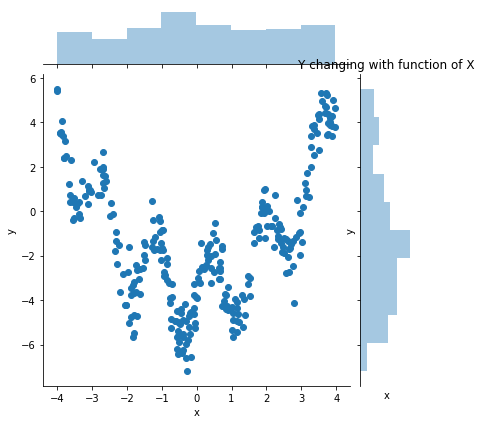

In [5]:
# Put your code here
import seaborn

seaborn.jointplot(mys['x'],mys['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Y changing with function of X')

**Question 3 (2 points)**: Before you start trying to fit any sort of models, what features do you see in the data? Describe any patterns or large scale behavior you notice in the data.

<font size=20>&#9998;</font> *Put your answer here.*

**Question 4 (8 points)**: Clearly a line doesn't seem like a good choice to model the properties of this dataset. However, a second order polynomial might be a good fit!

Now do the following:

1. Use NumPy's `polyfit` function to fit a polynomial of degree 2 to the data.
2. Use `poly1d` to create a function that can be used to plot the best fit curve on top of the data.
3. Generate 200 evenly spaced values between -4 and 4 and store those in a new variable called `x_model`
4. Plot the data and then overplot the `y_model` values that correspond to the `x_model` values you just created. You should be able to use the function you created using `poly1d` to do this!

Text(0.5, 1.0, 'Polynomial of degree 2 to the data')

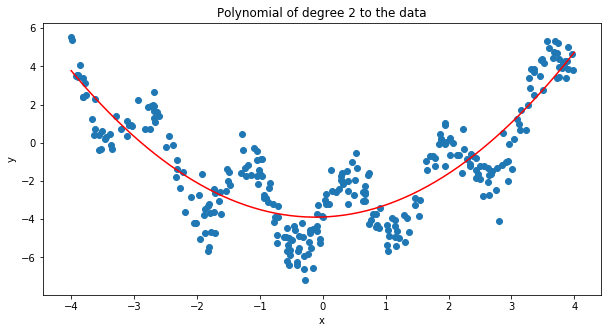

In [6]:
# Put your code here
x = mys['x']
y = mys['y']

x_model = np.linspace(-4,4,200)
plt.figure(figsize=(10,5))

polyfit = np.polyfit(x,y,2)g
y_model = np.poly1d(polyfit)

plt.plot(x_model,y_model(x_model),color='red')
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial of degree 2 to the data')

**Question 5 (4 points)**: How well does this model appear to fit the data? What are the best fit parameters for this model? **Make sure to print them out**. Are there features that still aren't captured by this model? If so, comment on which features these are.

In [7]:
print(y_model)

        2
0.5089 x + 0.12 x - 3.888


It fits ok for this model. It has crossed the trend of the scatter pots.
The best parameters for this model are 0.5089,0.12,3.888.
#__!!!!!!!!!!!!!!Are there features that still aren't captured by this model? If so, comment on which features these are.__

**Question 6 (4 points)**: Would a higher order polynomial fit the data better? Try fitting higher order polynomials and decide which one you think provides the "best" overall fit to the data. **Defend your choice below!**

*Note*: you may have to experiment a higher order polynomial than you might have ever previously tried! This is where `poly1d()` really comes in handy!

Text(0.5, 1.0, 'Polynomial of degree 30 to the data')

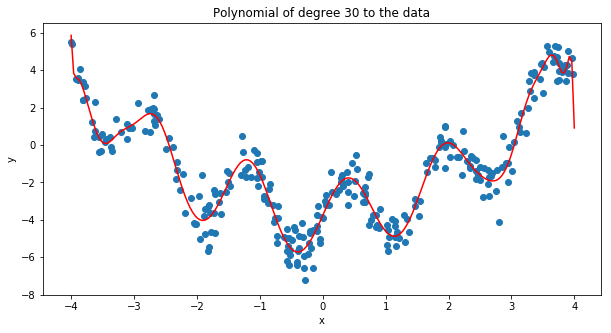

In [137]:
# Put your code here
x = mys['x']
y = mys['y']

x_model = np.linspace(-4,4,200)
plt.figure(figsize=(10,5))

polyfit = np.polyfit(x,y,30)
y_model = np.poly1d(polyfit)

plt.plot(x_model,y_model(x_model),color='red')
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial of degree 30 to the data')

In [9]:
print(y_model)

          30             29             28             27
2.76e-11 x  - 1.727e-11 x  - 3.251e-09 x  + 1.897e-09 x 
              26             25             24             23
 + 1.713e-07 x  - 9.423e-08 x  - 5.336e-06 x  + 2.804e-06 x 
              22             21           20             19
 + 0.0001091 x  - 5.569e-05 x  - 0.00154 x  + 0.0007783 x 
            18            17          16           15          14
 + 0.01535 x  - 0.007847 x  - 0.1088 x  + 0.05733 x  + 0.5434 x 
           13         12         11         10         9         8
 - 0.2976 x  - 1.871 x  + 1.027 x  + 4.245 x  - 1.858 x - 5.818 x
           7         6         5          4         3          2
 - 0.8055 x + 3.904 x + 11.39 x - 0.3919 x - 18.67 x + 0.1438 x + 7.655 x - 3.767


<font size=20>&#9998;</font> Higher order polynomial fits better with the data. It is not just a single line that goes through the scatter pots, but it's going through every part of scatter pots and fits with the shape scatter pots. The higher the order, the better the fitting.

**Question 7 (8 points)**: Although you might have been able to get a decent fit to the data using a higher order polynomial, it seem like such a polynomial is an overly complex way of fitting the data. Instead of just experimenting with `polyfit`, it might make more sense to use SciPy's `curve_fit` to fit a simple model to the data.

As you've hopefully noticed at this point, the second order polynomial seemed to do a good job of fitting the large scale behavior of the data, but there also appears to be a periodic signal in the data as well.

**Define a new function that combines a second order polynomial and a sinusoidal function and use `curve_fit` to find the best fit parameters for this new function.**

*Hint*: You may need to experiment with the `p0` parameters that you can feed into `curve_fit` to get a model that captures in the "wiggles" in the dataset.

In [129]:
# An important import command!
from scipy.optimize import curve_fit

# Put your code here
def p(x,A,B,C,D):
    return A*x**2+B*np.sin(C*x)+D

In [130]:
j,b=curve_fit(p,mys['x'],mys['y'],p0=[1,1,4,1])
print(j)

[ 0.49530688  1.97425076  4.01700563 -3.75901727]


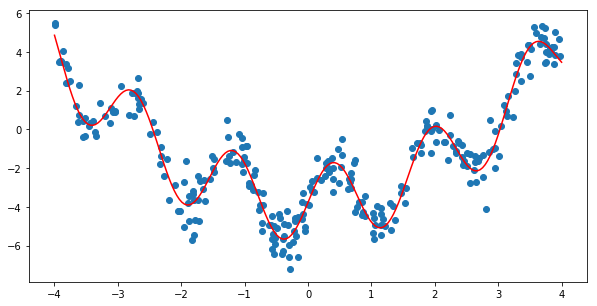

In [131]:
plt.figure(figsize=(10,5))

x_model = np.linspace(-4,4,200)
y_sin=p(x_model,j[0],j[1],j[2],j[3])
plt.scatter(mys['x'],mys['y'],label='mys')

plt.plot(x_model,y_sin,color='red',label='fit')



**Question 8 (2 points)**: Were you able to get a better looking fit for the model? How do your best fit parameters from `curve_fit` compare to the best fit parameters from your second order polynomial fit? Are any of them roughly the same? If so, discuss whether or not this what you would expect.

<font size=20>&#9998;</font> *Put your answer here.*

I was able to get a better looking fit for the model.Comparing with the second order polynomial fit, clearly the one that is from curve fit is doing a better job. It fits so much perfect than the second order polynomial fit does. We can say that they are roughly the same because they are following the rough curve trending. This can be said is what I expected, but I would prefer more fitting on the curves.

---
### Pushing further with MCMC

At this point, you feel like you've done a good job of fitting the data, but you'd really like to make sure you've got the best possible fit for some of your parameters. To do this, you're going to use a Markov Chain Monte Carlo (MCMC) approach. Although you could try using MCMC to calculate best fit values for _all_ of your parameters, you're going to limit your search to **just two** of the parameters in your model to keep things simple.

**Question 9 (1 point)**: Using your model from Question 7, you're going to pick **two** of the model parameters to explore with an MCMC approach and you will *leave all other parameters fixed* based on your results from Question 7. **State which two of your parameters you will be trying to fit with MCMC:**

<font size=20>&#9998;</font> *Which two parameters are you going to try and fit? Answer that here.*

I will choose parameter C and B

**Question 10 (1 point)**: Now, in order to use $\chi^2$ as our "cost function" for computing the goodness of fit, we also need to have an estimate of the error bars on our data points. Since we don't exactly know where the data came from, or what the "right" error bars should be, let's assume that the error for each point is 10% of its value. **Define a new array, `sigma` that is equal to 10% of the original `y` array in the dataset.** 

In [135]:
# Put your code here
sigma=mys['y']*0.1
sigma

0     -0.319314
1     -0.419710
2     -0.272507
3     -0.504745
4      0.275890
5     -0.180281
6      0.495885
7     -0.484645
8     -0.253859
9      0.339695
10    -0.463714
11     0.427878
12     0.355249
13    -0.640174
14    -0.130792
15    -0.189708
16     0.501098
17    -0.111558
18    -0.402296
19    -0.566953
20     0.022815
21    -0.365964
22     0.097902
23    -0.566875
24     0.003388
25     0.125785
26     0.437080
27     0.093597
28     0.419377
29    -0.218585
         ...   
270   -0.164956
271    0.427603
272    0.071762
273   -0.720954
274   -0.051301
275    0.522427
276   -0.493458
277    0.464362
278    0.229762
279    0.251725
280    0.094504
281   -0.406793
282   -0.501609
283   -0.159291
284    0.266993
285   -0.542816
286    0.383418
287   -0.328642
288   -0.386178
289    0.073796
290    0.198369
291   -0.238630
292    0.069551
293   -0.160750
294   -0.498465
295   -0.094094
296    0.439272
297    0.068095
298   -0.217688
299   -0.411256
Name: y, Length: 300, dt

**Question 11 (12 points)**: At this point we need to implement the MCMC algorithm to explore parameter space for the **two free parameters** that you chose in Question 9.

**All of your other parameters should be set to constants and you should use the values that came out of your best fit from Question 7**. For example, if you had a parameter `A` and the best fit value was 8.25 then you should set `A = 8.25` and use that in your model when doing the MCMC search for finding the best fit values for your two free parameters.

As a reminder, the equation for $\chi^2$ error is like so:

$$ \chi_R^2 = \frac{1}{N_{pts}}\sum_i \frac{(y_{data,i} - y_{model,i})^2}{2 \sigma_i^2} $$

The function for calculating this error is provided for you in the cell below (and cleverly called `calculate_error`)

#### Implementing the MCMC algorithm 

Using the Day 20 in-class assignment as a guide, you should now try to implement the MCMC algorithm to find the best fit for your two free parameters (part of the Day 20 notebook is also included for reference at the end of this notebook).

You should take **$n = 100000$** steps and use a step size of **0.05**. Remember, you can use your function from Question 7 to compute your model values!

**Upon completing the search, you should make the following plots**:

1. A plot of where your random walker "walked" in parameter space while it tried to find the best fit values (you can try starting your walker whever you want, but if you get strange results, it might be because you started the walker too far away). Your plot should basically be of "parameter 2" vs "parameter 1" as the walker walked for whatever your two parameters are.
1. A 2D histogram and contour plot that highlights where the best fit parameters are.

Finally, **you should print the best fit values and comment on how they compare to the values you found using `curve_fit`.**


In [138]:
def calculate_error(ys_actual, ys_model, sigma):
    """
    Calculate the chi-squared error between two sets of data
    """
    return ((ys_actual-ys_model)**2/(2*sigma**2)).sum()/(ys_actual.size)

In [ ]:
# Put all of the code necessary for implementing your MCMC search for the best fit parameters and visualizing the results.
# You may wish to create additional cells as necessary
ys_actual=1
ys_model=2
sigma=3

<font size=20>&#9998;</font> What are you best fit parameters? How do these compare to the values that `curve_fit` found?

*Put your answer here.*

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/zw3MaBYJWhY9XHrA7" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the submission link for Homework #6, and upload it there.

---
---
---


# Markov Chain Monte Carlo fitting

## How it works

The general idea behind MCMC fitting of our data is that we will start from a guess at our model parameters and "walk" in random directions in parameter space in a way that **on average gets us closer to the best fit to the data.**  We keep track of the points that we’ve sampled over time (we call this the "trace" of the data), and use those to create a distribution.  The distribution shows us how likely each set of model parameters is to fit the data.

We’re going to think about how this works using the model from our pre-class assignment as an example.
Specifically, you’re going to revisit fitting data of the form

$$
   f(x) = W x^2 + I
$$

by intelligently searching for optimal $W$ and $I$ (_width_ and _intercept_ of the parabola) values. Specifically, Metropolis-Hastings fitting consists of these steps:

1. Start with an initial guess of the model parameters, $(W_0, I_0)$.
2. Calculate $\chi_0^2$ for this initial guess.

Then, the following occurs in a loop over specified number of steps:

3. Take a (potential) "step" from $(W_0, I_0)$ in a random direction to produce $(W_1, I_1)$
4. Calculate the the ["reduced chi-squared"](https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic) values (as done in the pre-class), $\chi_0^2$ and $\chi_1^2$, for the parabolas defined by $(W_0, I_0)$ and $(W_1, I_1)$.
5. Calculate an acceptance probability, $P = e^{-\chi_1^2}/e^{-\chi_0^2}$, as the ratio of two *likelihood functions* (the exponentials).
6. Uniformly generate a random number $r \in [0, 1)$. If $r < P$, "accept" $(W_1, I_1)$ as the next initial guess and assign $\chi_0^2$=$\chi_1^2$. Otherwise, discard $(W_1, I_1)$ and generate a new potential step from $(W_0, I_0)$.
7. Repeat this process until you’ve generated as many points as you care to (100000 isn’t bad).

### Notes:

* The Markov-chain part of Markov-chain Monte Carlo means "the next step only depends on the current step."
* If $\chi_1^2 < \chi_0^2$ (i.e. the error from $(W_1, I_1)$ is less than the error from $(W_0, I_0)$), then $P > 1$ and the new point is _always_ accepted.
* By keeping track of the valid steps, we can chart the progress of a "walker" as it (hopefully!) moves towards a set of optimum values. The walker will tend to stay in the region of good fit but its wandering will inform on the range of likely values.
* The randomness here _usually_ prevents walkers from moving in sub-optimal (higher-error) directions but occasionally allows it to happen in hopes of finding even lower error zones.